<a href="https://colab.research.google.com/github/AashiDutt/Kaggle/blob/main/Worldwide_traffic_congestion_Ranking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:**
https://www.kaggle.com/datasets/kkhandekar/worldwide-traffic-congestion-ranking

Contributed by KOUSTUBHK 


**About the Dataset**
Worldwide Traffic Congestion Ranking [between: 19Jun2022 & 26Jun2022]
TCI, calculated only for the center of the tracked location (the city image is split in 9 equal rectangles, forming a 3x3 grid. The central rectangle is taken into consideration when calculating TCI).

Every 20 minutes, the web app saves an image for each tracked location, containing the traffic data reported by Google Maps. After a couple of minutes, the images are analyzed, and the percentages of the 4 traffic colors are calculated.

Let's call these percentages:

green → P0

orange → P1

red → P2

dark red → P3

Obviously , the sum of all these percentages is 100:

P0 + P1 + P2 + P3 = 100
Based on these percentages, the TCI (Traffic Congestion Index) is calculated:

TCI = (0 * P0) + (1 * P1) + (2 * P2) + (3 * P3)


In [1]:
data = '/content/Traffic_congestion_ranking_dataset.zip'

In [2]:
!unzip Traffic_congestion_ranking_dataset.zip

Archive:  Traffic_congestion_ranking_dataset.zip
  inflating: TrafficIndex_19Jun2022-26Jun2022.csv  


In [3]:
import pandas as pd
import numpy as numpy

df = pd.read_csv('TrafficIndex_19Jun2022-26Jun2022.csv')
df.head(10)

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50
5,6,Mexico City,35.94,169.08
6,7,Kraków,35.83,114.84
7,8,New York City,33.77,123.34
8,9,Warsaw,33.37,131.22
9,10,Lima,32.71,99.08


In [4]:
df.info

<bound method DataFrame.info of     Rank       City  AverageTCI  MaxTCI
0      1      Lagos       60.16  130.21
1      2       Riga       47.12   87.51
2      3     Mumbai       38.37  153.41
3      4     Tehran       38.20  110.12
4      5     London       38.16  128.50
..   ...        ...         ...     ...
63    64  Singapore        5.23   42.93
64    65   Helsinki        4.67   22.43
65    66      Turin        4.29   46.20
66    67   Valencia        3.40   31.97
67    68   Zaragoza        2.01   42.18

[68 rows x 4 columns]>

In [5]:
df.isnull().sum()

Rank          0
City          0
AverageTCI    0
MaxTCI        0
dtype: int64

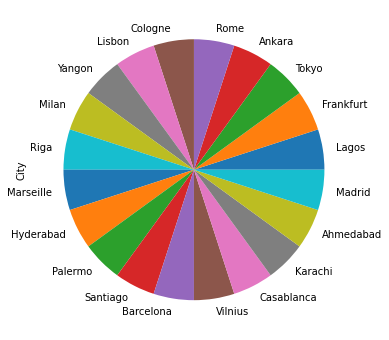

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df['City'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

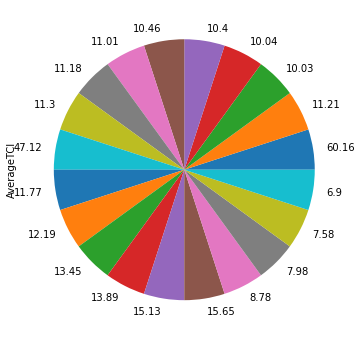

In [8]:
df['AverageTCI'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

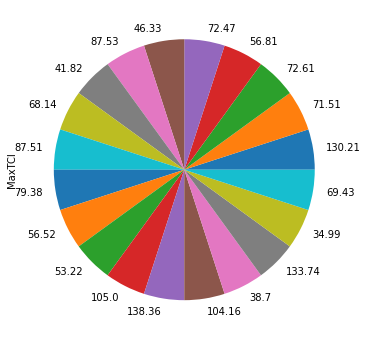

In [7]:
df['MaxTCI'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))

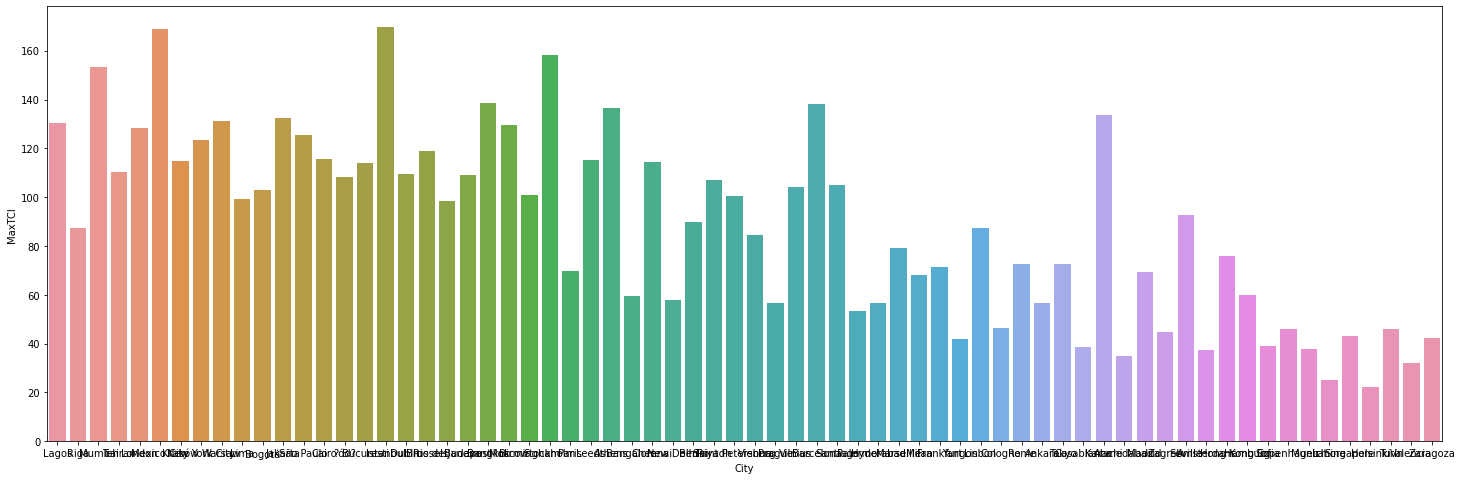

In [13]:
#City Vs MaxTCI

import seaborn as sns
plt.figure(figsize = (25,8))
sns.barplot(x = 'City', y = 'MaxTCI', data = df)

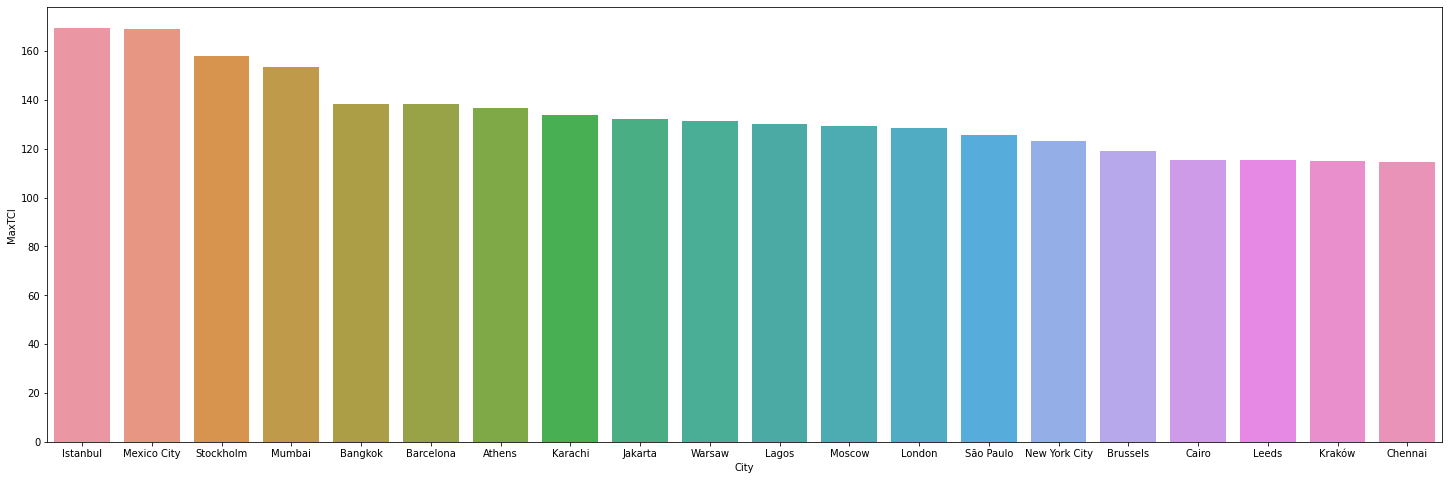

In [17]:
cities_with_same_TCI = df.groupby(['City'])['MaxTCI'].sum().reset_index()
cities_with_same_TCI = cities_with_same_TCI.sort_values('MaxTCI', ascending = False)
plt.figure(figsize = (25,8))
sns.barplot(x = 'City', y = 'MaxTCI', data = cities_with_same_TCI.head(20))

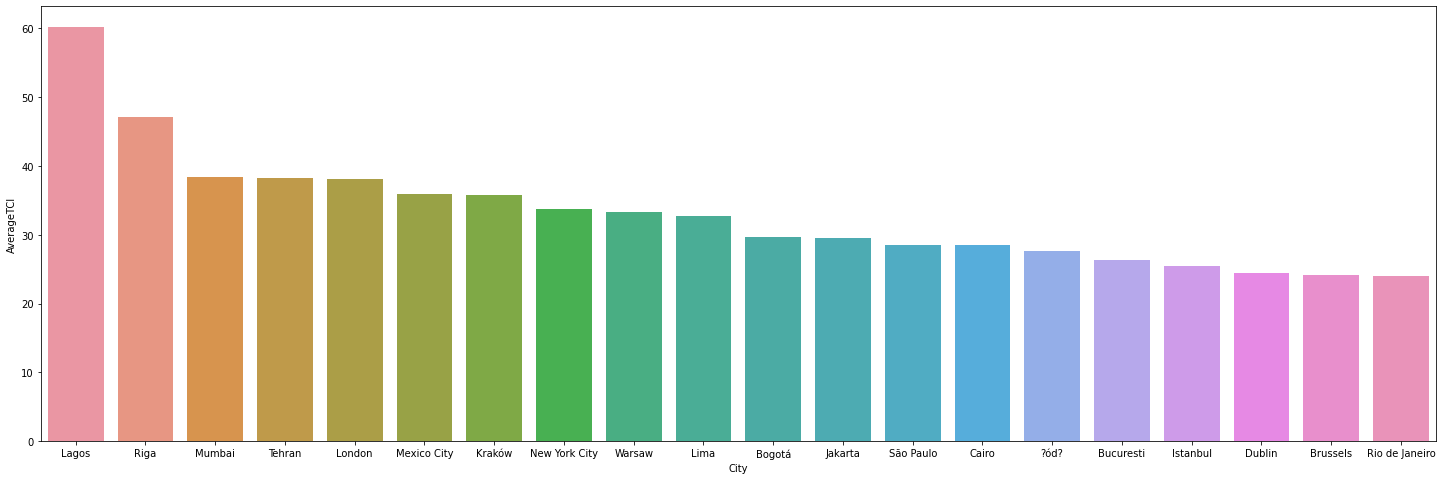

In [16]:
cities_with_same_TCI = df.groupby(['City'])['AverageTCI'].sum().reset_index()
cities_with_same_TCI = cities_with_same_TCI.sort_values('AverageTCI', ascending = False)
plt.figure(figsize = (25,8))
sns.barplot(x = 'City', y = 'AverageTCI', data = cities_with_same_TCI.head(20))

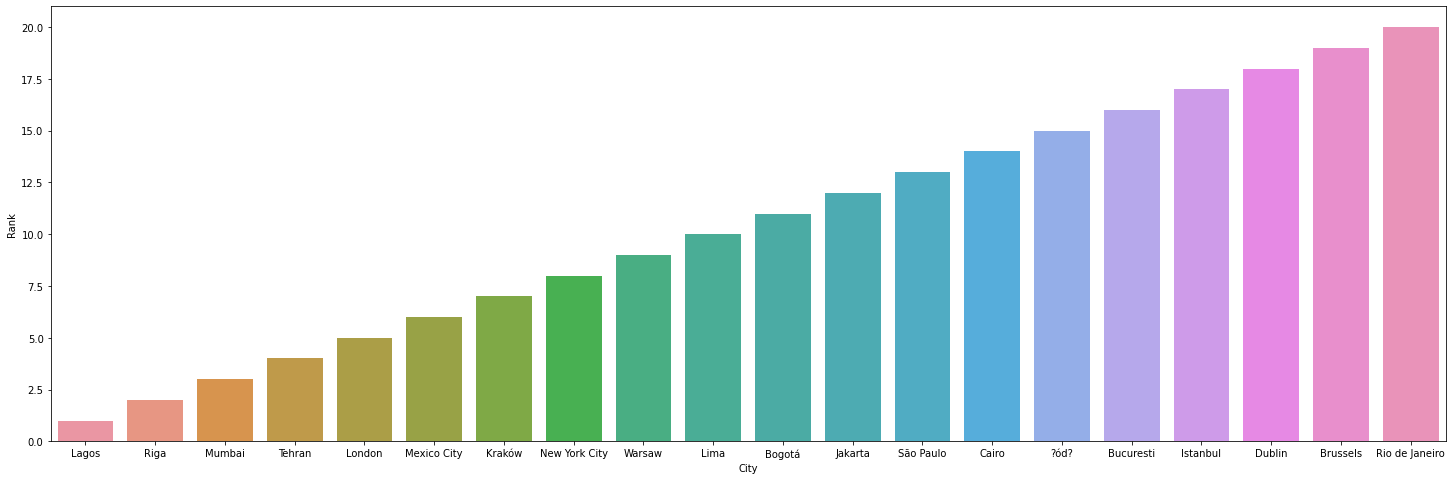

In [19]:
#Rank Vs City plot

plt.figure(figsize = (25,8))
sns.barplot(x = 'City', y = 'Rank', data = df.head(20))